# FINAL PROJECT

# 2. THE DATA

## 2.1 Dataset Understanding

In [1]:
import pandas as pd

# Read a CSV file and create a DataFrame
df = pd.read_csv("Data_Negara_HELP.csv")

# Access the entire DataFrame
display(df)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

## 2.2 EDA PART 1
1. Multivariate Analysis

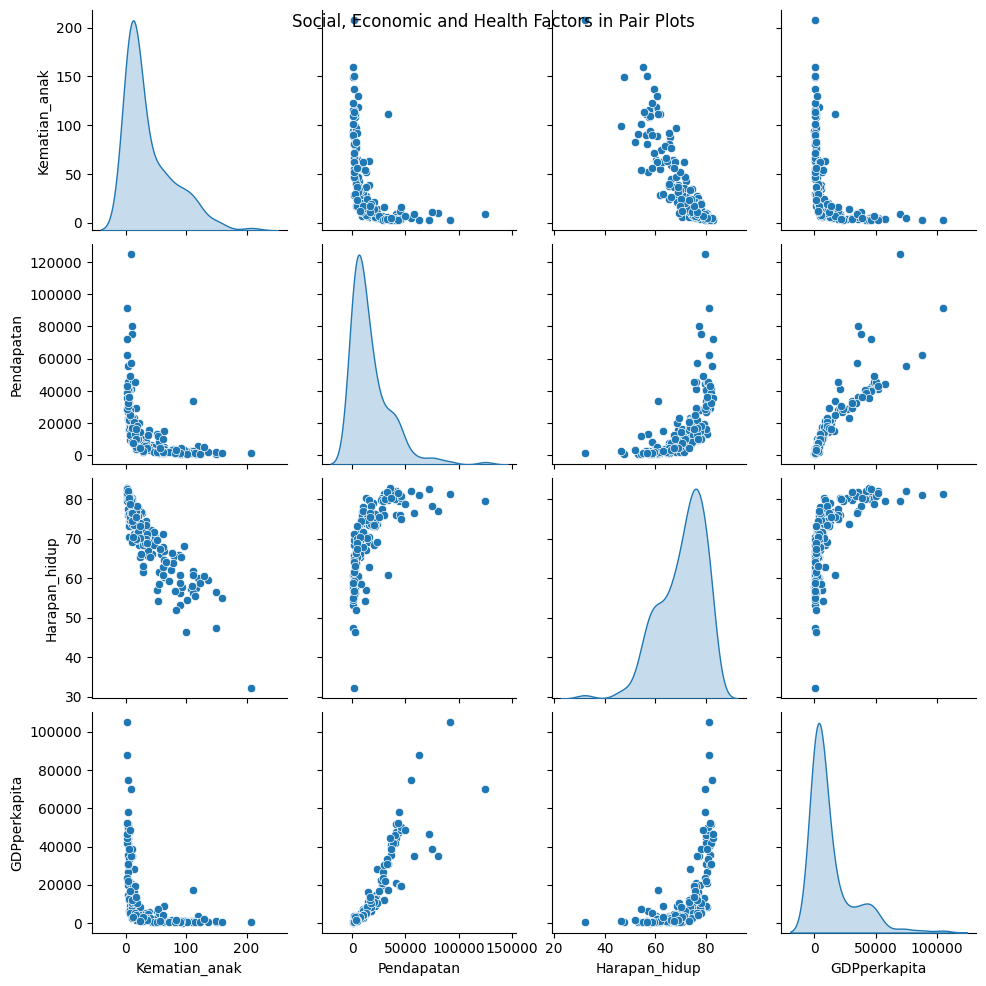

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the relationship between all features with pairplot
selectedfeatures = ['Kematian_anak', 'Pendapatan', 'Harapan_hidup', 'GDPperkapita']
sns.pairplot(df[selectedfeatures], diag_kind='kde')
plt.suptitle("Social, Economic and Health Factors in Pair Plots")
plt.show()

<ipython-input-6-1079ad19c2e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


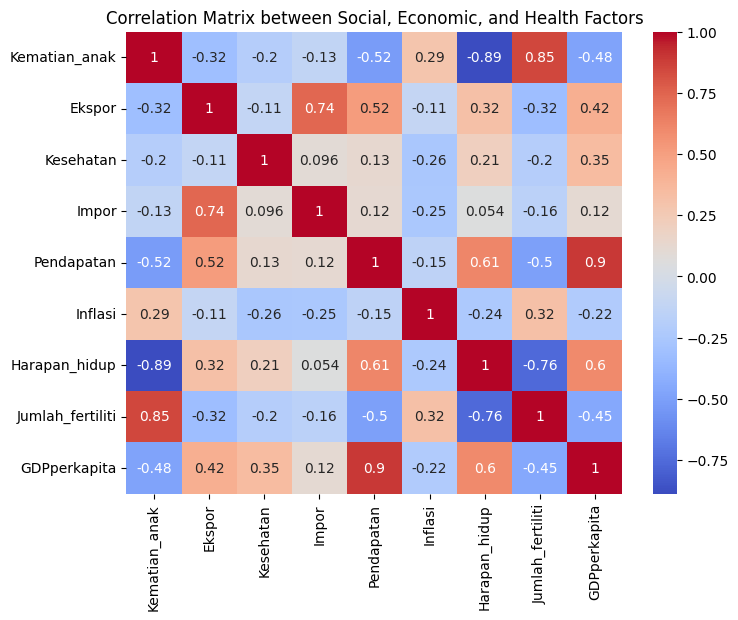

In [6]:
# Checking the correlation between all features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Social, Economic, and Health Factors')
plt.show()

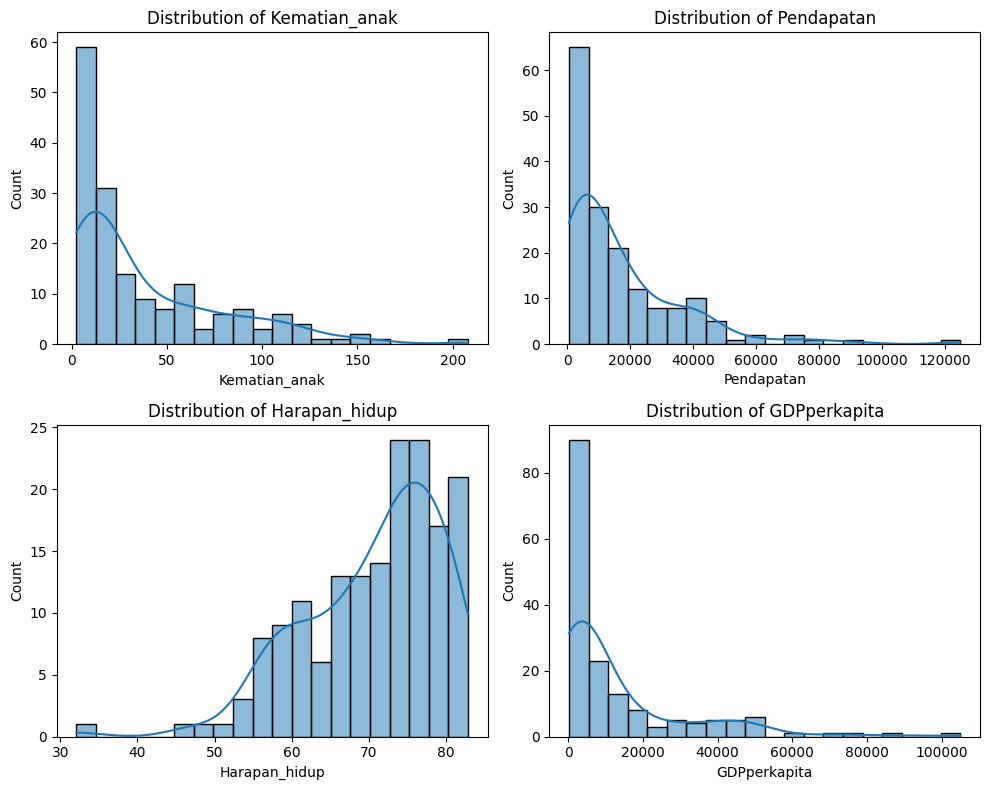

In [7]:
# Checking the distribution of variables with a histogram
plt.figure(figsize=(10, 8))
for feature in selectedfeatures:
    plt.subplot(2, 2, selectedfeatures.index(feature) + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## 2.3 Features Selection

This feature selection can be done based on the results of EDA Part 1, namely looking at the relationship, correlation, and distribution results obtained. However, in addition, there is a connection with the essence or meaning of Life Expectancy and Income. Although the correlation value is still below Income x GDP (0.90) & Child mortality x Total fertility (0.85). I chose the Life Expectancy x Income feature (Heatmap corr value = 0.61) for the following essential reasons:

1. Life expectancy (Harapan_hidup) is a means of evaluating the government's performance in improving the welfare of the general population in a country. Life expectancy is influenced by environmental conditions, food availability, education, government policies and the economy of the community and so on.
2. Income (Pendapatan) has a direct effect on the economy, life, education, disease prevention and life expectancy.

## 2.4 Data Cleaning

### 1. Missing Values

In [8]:
# Check if there are missing values in the dataset for the Life Expectancy and Income features.
missing_values_harapan_hidup = df['Harapan_hidup'].isnull().sum()
missing_values_pendapatan = df['Pendapatan'].isnull().sum()

display(missing_values_harapan_hidup)
display(missing_values_pendapatan)

0

0

> Result = No missing values

### 2. Outliers

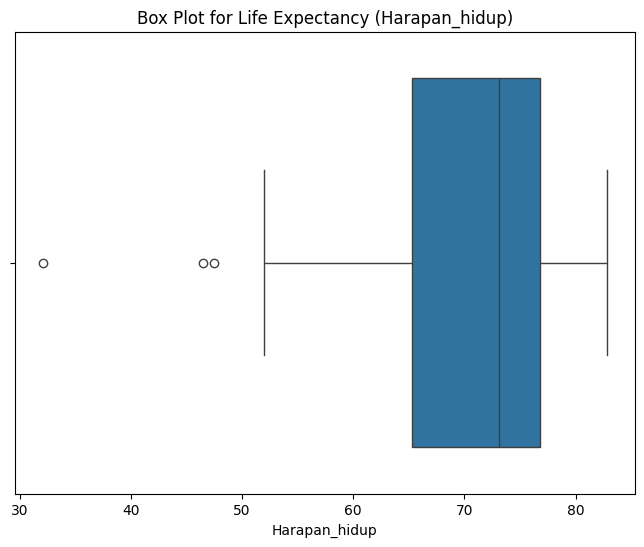

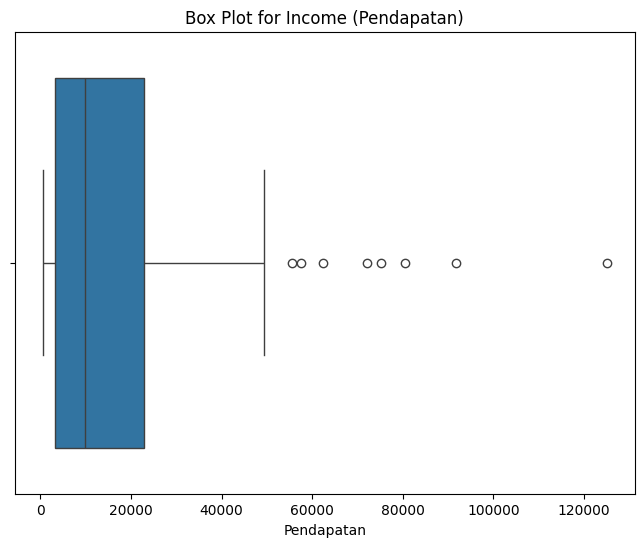

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the boxplot for the Life Expectancy (Harapan_hidup) feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Harapan_hidup'])
plt.title("Box Plot for Life Expectancy (Harapan_hidup)")
plt.show()

# Display the boxplot for the Income (Pendapatan) feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Pendapatan'])
plt.title("Box Plot for Income (Pendapatan)")
plt.show()

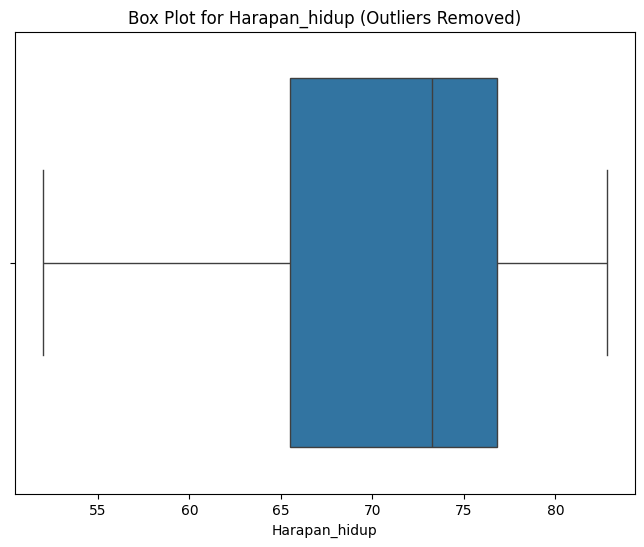

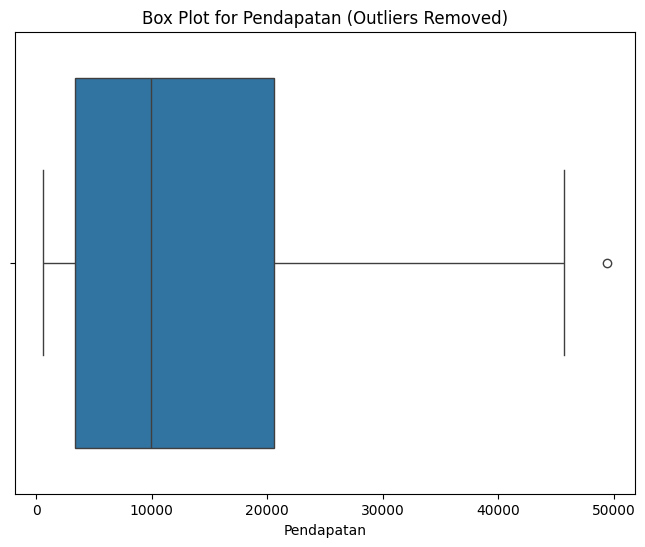

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

# Calculating IQR
q1 = df['Harapan_hidup'].quantile(0.25)
q3 = df['Harapan_hidup'].quantile(0.75)
iqr = q3 - q1

# Determine the upper and lower bounds of outliers
batas_atas = q3 + 1.5 * iqr
batas_bawah = q1 - 1.5 * iqr

# Removing outliers
df = df.loc[(df['Harapan_hidup'] <= batas_atas) & (df['Harapan_hidup'] >= batas_bawah)]

# Display the boxplot after outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Harapan_hidup'])
plt.title("Box Plot for Harapan_hidup (Outliers Removed)")
plt.show()

# Calculating IQR
q1 = df['Pendapatan'].quantile(0.25)
q3 = df['Pendapatan'].quantile(0.75)
iqr = q3 - q1

# Determine the upper and lower bounds of outliers
batas_atas = q3 + 1.5 * iqr
batas_bawah = q1 - 1.5 * iqr

# Removing outliers
df = df.loc[(df['Pendapatan'] <= batas_atas) & (df['Pendapatan'] >= batas_bawah)]

# Display the boxplot after outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Pendapatan'])
plt.title("Box Plot for Pendapatan (Outliers Removed)")
plt.show()


## 2.5 EDA PART 2

* Univariate Analysis

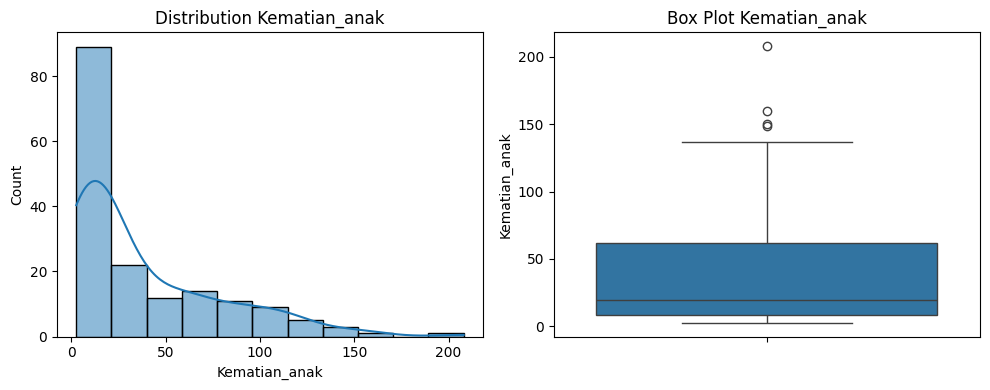

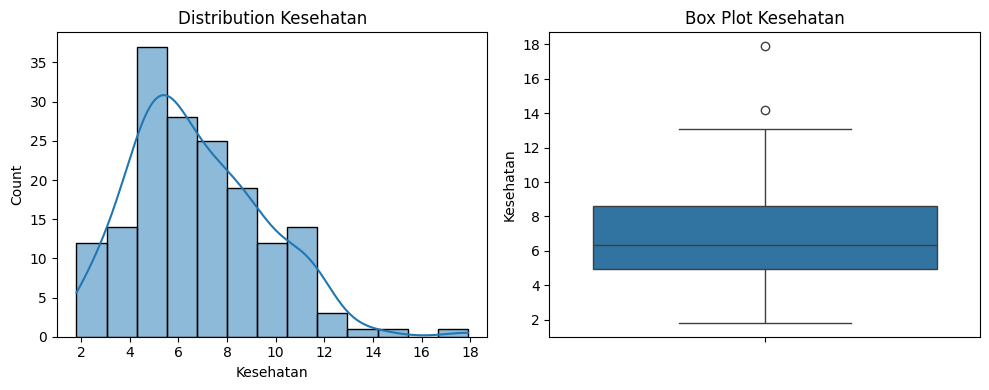

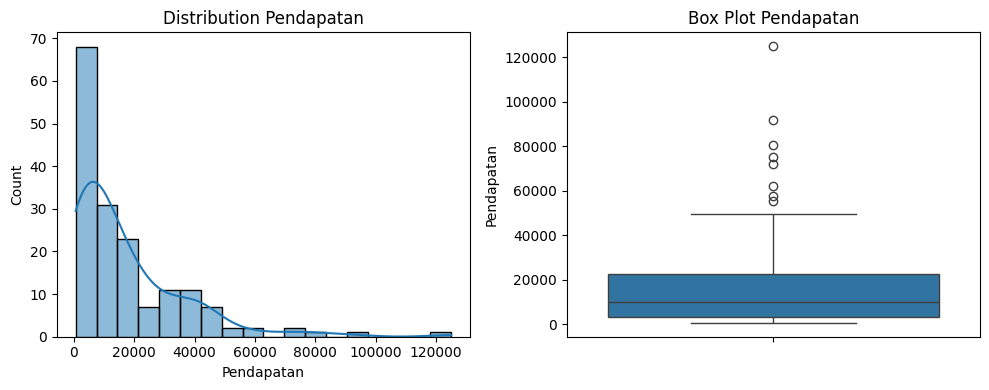

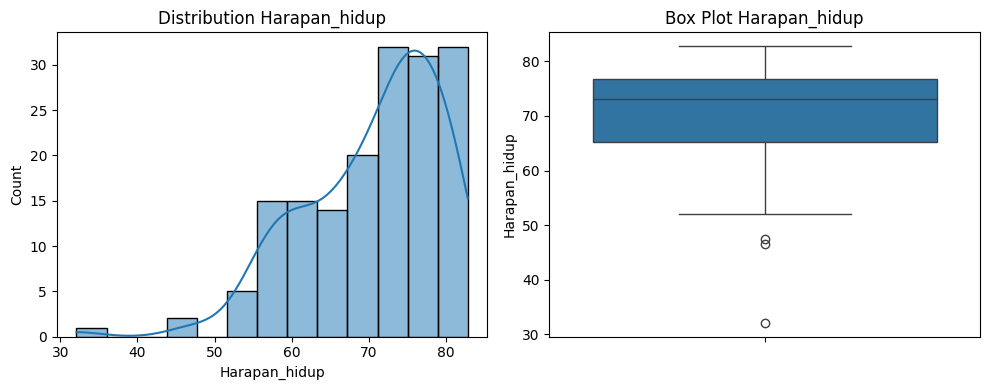

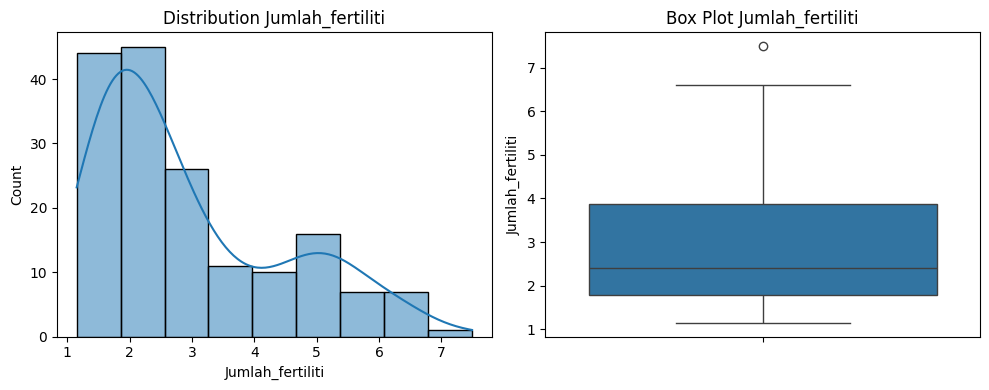

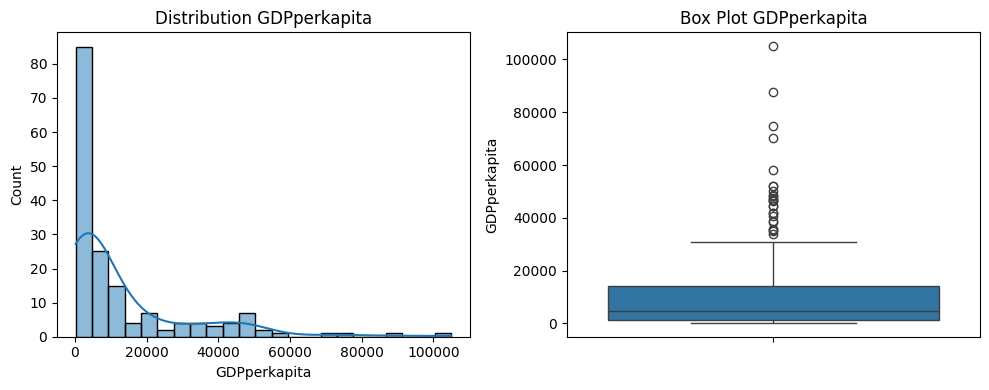

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv("Data_Negara_HELP.csv")

# Columns to be analyzed
selected_features = ['Kematian_anak', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

# Univariate analysis for each selected column
for feature in selected_features:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution {feature}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot {feature}')

    plt.tight_layout()
    plt.show()

* Bivariate Analysis

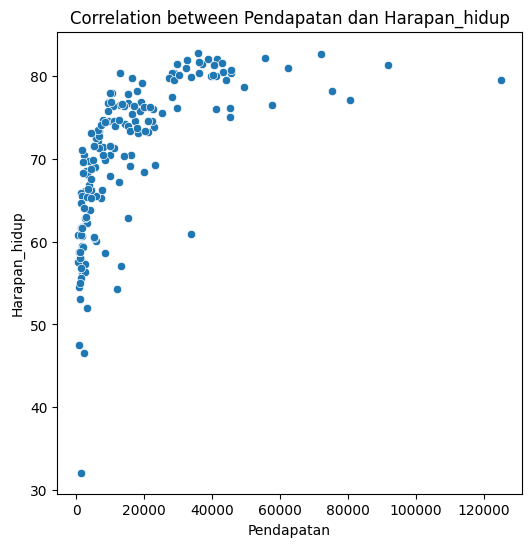

In [12]:
# Columns to be analyzed
selected_features = ['Kematian_anak', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

# Bivariate analysis for association between selected columns
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        feature1 = selected_features[i]
        feature2 = selected_features[j]

        # Filter only for Life Expectancy and Income features
        if (feature1 == 'Pendapatan' and feature2 == 'Harapan_hidup') or (feature1 == 'Harapan_hidup' and feature2 == 'Pendapatan'):
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=df, x=feature1, y=feature2)
            plt.title(f'Correlation between {feature1} dan {feature2}')
            plt.show()

# CLUSTERING

SCALING DATA

In [23]:
from sklearn.preprocessing import StandardScaler

# Select the features to be used for clustering
features_for_clustering = df[['Harapan_hidup', 'Pendapatan']]

# Perform data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

Decide the number of scalling

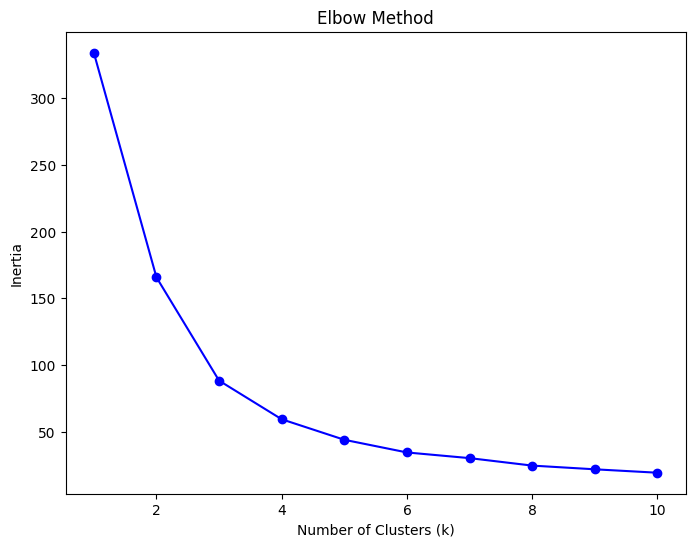

In [31]:
from sklearn.cluster import KMeans

# Finding inertia values for various number of clusters (k) from 1 to 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Setting the n_init value explicitly
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graphic for Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Clustering with the Decided Amount of Cluster

In [15]:
# Perform clustering with the selected number of clusters
chosen_clusters = 4  # Customize
kmeans = KMeans(n_clusters=chosen_clusters, n_init=10, random_state=42)  # Setting the n_init value explicitly
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels


Create the Clustering Result Graph

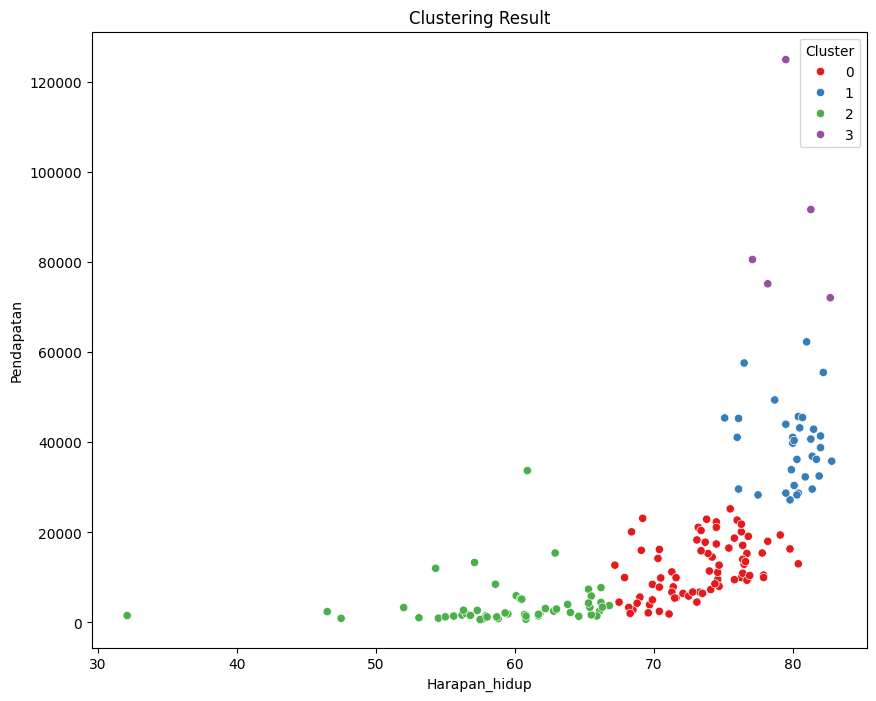

In [16]:
# Create a clustering result graph
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Harapan_hidup', y='Pendapatan', hue='Cluster', palette='Set1')
plt.title('Clustering Result')
plt.show()

In [17]:
# Identify countries within each cluster
for cluster_id in range(chosen_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    countries_in_cluster = cluster_data['Negara'].tolist()

    print(f"Negara-negara dalam Kluster {cluster_id}:")
    print(countries_in_cluster)

Negara-negara dalam Kluster 0:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Grenada', 'Guatemala', 'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritania', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen']
N

In [18]:
# Identify countries in cluster 2
cluster_id2 = 2
cluster_data2 = df[df['Cluster'] == cluster_id2]
countries_in_cluster2 = cluster_data2['Negara'].tolist()

# Result
print(f"Negara-negara dalam Kluster {cluster_id2}:")
print(countries_in_cluster2)


Negara-negara dalam Kluster 2:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Vanuatu', 'Zambia']


In [32]:
display(cluster_data2)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662,2
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.150,46.5,3.30,1170,2
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,2
166,Zambia,83.1,37.000,5.89,30.9000,3280,14.000,52.0,5.40,1460,2
94,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459,2
137,South Africa,53.7,28.600,8.94,27.4000,12000,6.350,54.3,2.59,7280,2
106,Mozambique,101.0,31.500,5.21,46.2000,918,7.640,54.5,5.56,419,2
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,2
64,Guinea-Bissau,114.0,14.900,8.50,35.2000,1390,2.970,55.6,5.05,547,2
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,2


In [27]:
# Specify the columns to be ranked
ranking_columns = ['Harapan_hidup', 'Pendapatan']

# Ranking
cluster_data2 = cluster_data2.sort_values(ranking_columns)

# Result top 5
display(cluster_data2.head(5))


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,2
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,2


In [21]:
cluster_data2.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,85.936538,30.767673,6.317692,44.864729,3895.442308,10.785673,59.500000,4.653654,1910.115385,2.0
std,37.296034,18.584037,2.819826,20.235569,5276.712548,15.152639,6.086146,1.256498,2804.904267,0.0
min,24.100000,0.109000,1.970000,0.065900,609.000000,0.885000,32.100000,2.410000,231.000000,2.0
25%,62.200000,18.300000,4.525000,29.900000,1405.000000,3.740000,57.025000,3.575000,559.750000,2.0
50%,82.050000,24.350000,5.410000,43.100000,2135.000000,6.810000,60.450000,4.915000,977.500000,2.0
75%,111.000000,41.725000,7.715000,55.200000,4055.000000,12.150000,63.850000,5.407500,1700.000000,2.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,104.000000,66.800000,7.490000,17100.000000,2.0


In [22]:
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 66 to 107
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            52 non-null     object 
 1   Kematian_anak     52 non-null     float64
 2   Ekspor            52 non-null     float64
 3   Kesehatan         52 non-null     float64
 4   Impor             52 non-null     float64
 5   Pendapatan        52 non-null     int64  
 6   Inflasi           52 non-null     float64
 7   Harapan_hidup     52 non-null     float64
 8   Jumlah_fertiliti  52 non-null     float64
 9   GDPperkapita      52 non-null     int64  
 10  Cluster           52 non-null     int32  
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 4.7+ KB
